# Introduction

## CRISP - DM Method
### Business Understanding
### Data Understanding
### Data Prep
### Modeling
### Evaluation
### Deployment

## 1. Business Understanding

- This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.
- Can you categorize news articles based on their headlines and short descriptions?
- Do news articles from different categories have different writing styles?
- A classifier trained on this dataset could be used on a free text to identify the type of language being used.

## 2. Data Understanding

In [4]:
# Grouping / Classification of documents based on Text Analysis - Part 1 
## Graphics Analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#check versions of packages
print('Python version:')  
!python --version
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
# print('scikit-learn version:', sklearn.__version__)
# print('NLTK version:', nltk.__version__)

Python version:
Python 3.8.5
pandas version: 1.2.4
numpy version: 1.19.2


In [6]:
# Setting the parameters for the pandas dataframe

output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [7]:
#Step 1: Load data into a dataframe 
# This dataset contains the topics already marked and so I would like to use this 
# as training set for my model.
# I have a separate test data set for testing.

filename = "~/Documents/mygithub/bu_dsc/data/external/News_Category_Dataset_v2.json"

df_all = pd.read_json(filename, lines = True)
#display the first few rows of data
df_all.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


In [8]:
# Step 2: Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.
print("The dimension of the table is: ", df_all.shape)
print("Checking to see if there are any missing data: ")
df_all.info()

The dimension of the table is:  (200853, 6)
Checking to see if there are any missing data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [9]:
#Step 3: what type of variables are in the table 
# Look at summary information about your data (total, mean, min, max, freq, unique, etc.) 
# Does this present any more questions for you? 
# Does it lead you to a conclusion yet?

print("Describe Data") 
print(df_all.describe()) 
print("Summarized Data") 
print(df_all.describe(include='O'))

Describe Data
        category        headline authors                                                                                                                        link short_description                 date
count     200853          200853  200853                                                                                                                      200853            200853               200853
unique        41          199344   27993                                                                                                                      200812            178353                 2309
top     POLITICS  Sunday Roundup          https://www.huffingtonpost.comhttp://elections.huffingtonpost.com/pollster/2016-california-democratic-presidential-primary                    2012-12-21 00:00:00
freq       32739              90   36620                                                                                                                           2      

In [10]:
# Breaking down the date column to Year and month separate columns for easy analysis
# the date column is having the data in the datetime format

df_all['year'] = df_all['date'].apply(lambda x: x.year)
df_all['month'] = df_all['date'].apply(lambda x: x.month)

df_all.head()

,category,headline,authors,link,short_description,date,year,month
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26,2018,5
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26,2018,5
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26,2018,5
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26,2018,5
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26,2018,5


In [11]:
# df_all.columns
for col in df_all.columns[[0,6,7]]:
    print(col,len(df_all[col].unique()),df_all[col].unique())

category 41 ['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']
year 7 [2018 2017 2016 2015 2014 2013 2012]
month 12 [ 5  4  3  2  1 12 11 10  9  8  7  6]


In [12]:
# Display the dimensions of the dataframe post addition of the new columns
# We now see that it has 2 more columns added towards the end as year and month of type integer

print("The dimension of the table is: ", df_all.shape)
print("Checking to see if there are any missing data: ")
df_all.info()

The dimension of the table is:  (200853, 8)
Checking to see if there are any missing data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
 6   year               200853 non-null  int64         
 7   month              200853 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 12.3+ MB


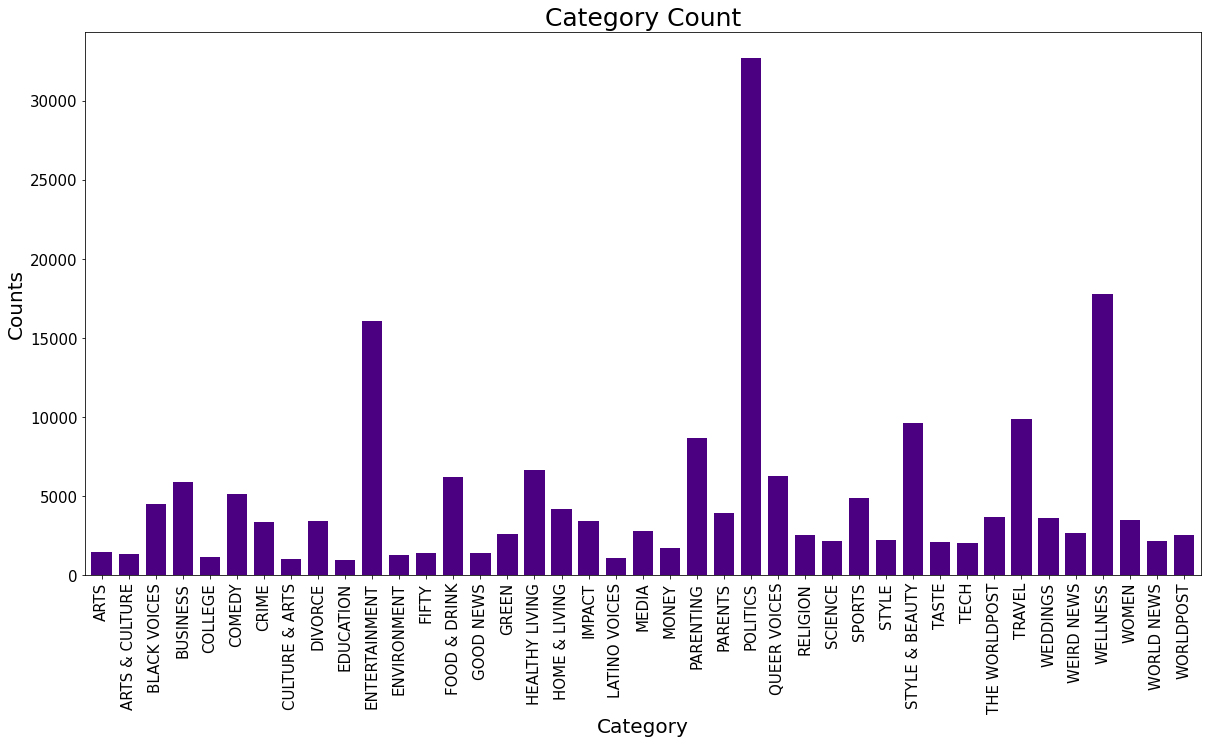

In [13]:
# Barcharts: set up the figure size 
# This barchart shows the count of topics for each category.
# Creating a separate dataframe for the categories in the training set
# We can see that the Top 3 categories include Politics,Wellness and Entertainment and those are by far more than the rest.
# %matplotlib inline 

# In the X axis we are showing article categories
# The Y axis shows the corresponding counts 
width = 0.75 # the width of the bars

df_catg = df_all.groupby(['category'])['category'].count()

ax = df_catg.plot(kind='bar', figsize=(20,10), color="indigo",width = width)

plt.xticks(rotation=90)
ax.set_title('Category Count', fontsize=25) 
ax.set_xlabel('Category', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.tick_params(axis='both', labelsize=15)

plt.show()


In [35]:
# Now subsetting the actual dataset
# Subsetting the dataset by category and year

subset_bycatgyear = df_all[['category','year']]
# This is an array of the years in the dataset
years = subset_bycatgyear['year'].unique()
years
# This shows an array of categories that is present in our dataset
# categories = subset_bycatgyear['category'].unique()
# categories


array([2018, 2017, 2016, 2015, 2014, 2013, 2012])

In [26]:
# Creating a grouping subset to be used in my analysis later

year_grp = subset_bycatgyear.groupby(['year'])

In [30]:
# displaying the data
# print('showing all the categories for a particular year:')
# year_grp.get_group(2012)
print('showing all the categories for a particular year:')
year_grp['category'].value_counts().loc[2018]

showing all the categories for a particular year:


category
POLITICS          3067
ENTERTAINMENT     1720
WORLD NEWS         565
QUEER VOICES       451
COMEDY             443
BLACK VOICES       408
SPORTS             364
MEDIA              293
WOMEN              245
WEIRD NEWS         206
CRIME              174
BUSINESS            86
LATINO VOICES       83
IMPACT              77
TRAVEL              72
RELIGION            65
TECH                55
SCIENCE             40
PARENTS             36
STYLE               34
EDUCATION           32
GREEN               29
HEALTHY LIVING      15
ARTS & CULTURE      13
TASTE                9
COLLEGE              1
Name: category, dtype: int64

In [40]:
# df = year_grp['category'].value_counts().loc[2012].head(3)

df = year_grp['category'].value_counts().head(3)

df

year  category      
2012  WELLNESS          7138
      STYLE & BEAUTY    5193
      TRAVEL            3229
Name: category, dtype: int64

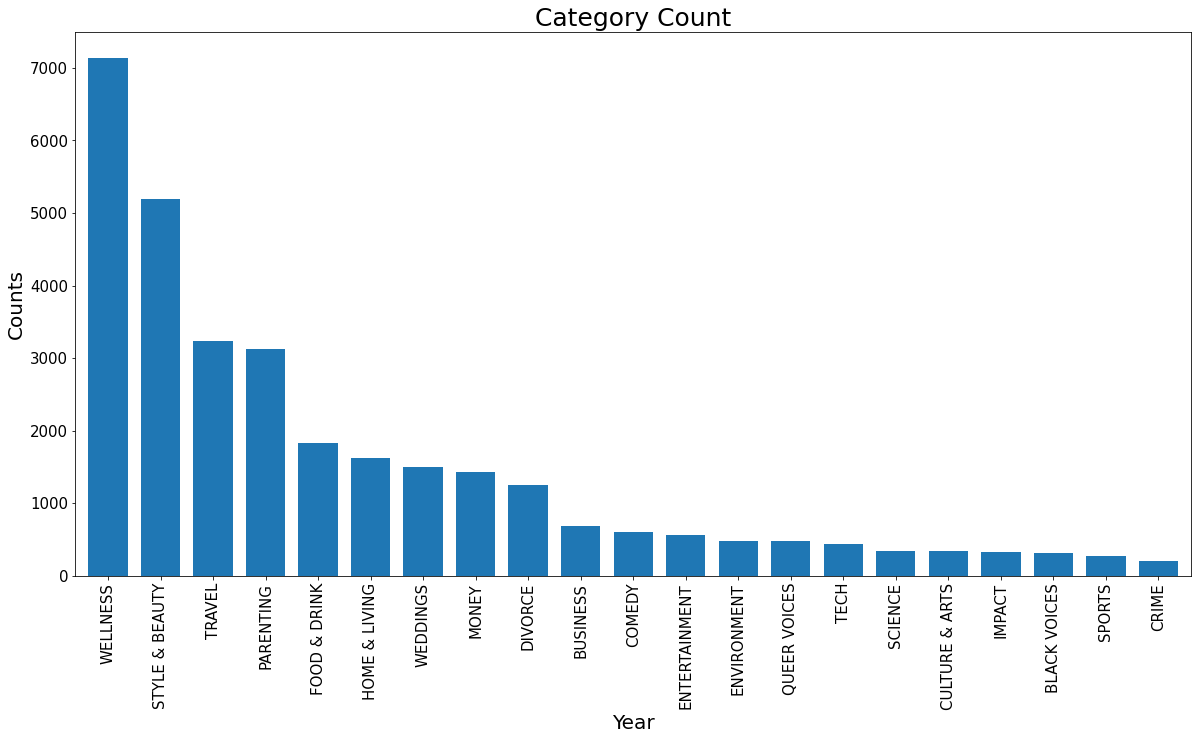

In [38]:
# Grouped barcharts: set up the figure size 
# This barchart shows the count of topics for each category.
# We can see that the Top 3 categories include Politics,Wellness and Entertainment and those are by far more than the rest.
# %matplotlib inline 

# In the X axis we are showing article categories
# The Y axis shows the corresponding counts 
width = 0.75 # the width of the bars

# Get the data
# df = subset_bycatgyear.groupby(['year','category'])['category'].count()
# df = subset_bycatgyear.groupby(['year','category']).size().unstack(level=2)

ax = df.plot(kind='bar', figsize=(20,10), width = width)

# Define the bar


# make the bar plot
plt.xticks(rotation=90)
ax.set_title('Category Count', fontsize=25) 
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.tick_params(axis='both', labelsize=15)

plt.show()

In [ ]:
'''
Now that you have created your idea, located data, and have started your graphical analysis, we need to shift to starting the dimensionality/feature reduction and feature engineering steps of the project.

It is important to note that these are milestones, meant to keep you on track for the final project submission. At any point, you can pivot or modify your project as needed based on what you discover. These milestones are not final versions; they are drafts of the many steps you need to complete along the way.

In Milestone 2, you should drop any features that are not useful for your model building. You should explain and justify why the feature dropped is not useful. You should address any missing data issues. Build any new features that you need for your model, e.g., create dummy variables for categorical features if necessary. Explain your process at each step. You can use any methods/tools you think are most appropriate. Again, keep in mind that this may look very different from what is done in the Titanic tutorial case study. You should do what makes sense for your project. Be careful to avoid data snooping in these steps.

As a reminder – Teams is a great place to discuss your project with your peers. Feel free to solicit feedback/input (without creating a group project!) and collaborate on your projects with your peers.

Each milestone will build on top of each other, so make sure you do not fall behind.

Submit Milestone 2 as a PDF or Jupyter Notebook, along with any applicable code to the submission link.
'''